In [2]:
#tuto from https://www.youtube.com/watch?v=3kj8uoOlwjg
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
imagePath = 'R10m/'
band2 = rasterio.open(imagePath+'B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'B04_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'B08_10m.jp2', driver='JP2OpenJPEG') #near impact

In [4]:
band4.count #number of bands

1

In [5]:
band4.width #number of columns

10980

In [6]:
band4.height #number of rows

10980

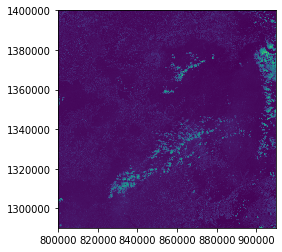

In [7]:
plot.show(band4)

In [8]:
band4.dtypes #Types

('uint16',)

In [9]:
print(band4.crs) #Pas la même sortie que dans le tuto...
print(band3.crs)
print(band2.crs)
print(band8.crs)

EPSG:32648
EPSG:32648
EPSG:32648
EPSG:32648


In [14]:
print(band4.transform) #Usefull when you want to convert a matrix array into a raster

| 10.00, 0.00, 799980.00|
| 0.00,-10.00, 1400040.00|
| 0.00, 0.00, 1.00|
<class 'affine.Affine'>
| 10.00, 0.00, 801980.00|
| 0.00,-10.00, 1398040.00|
| 0.00, 0.00, 1.00|


In [10]:
print(band2.read(1))
print(band3.read(1))
print(band4.read(1))
print(band8.read(1))

[[  243   243   277 ...   239   262   236]
 [  313   292   335 ...   212   249   310]
 [  285   323   340 ...   205   214   298]
 ...
 [  663   637   589 ... 12656 13264 13336]
 [  676   621   582 ... 12400 13096 13144]
 [  682   667   625 ... 12088 12616 12248]]
[[  516   550   560 ...   383   473   485]
 [  582   587   609 ...   468   436   569]
 [  503   559   569 ...   442   393   544]
 ...
 [  899   794   768 ... 12136 12728 12784]
 [  898   833   803 ... 11912 12400 12392]
 [  844   871   846 ... 11632 11864 11552]]
[[  359   389   418 ...   265   261   236]
 [  541   555   582 ...   281   282   328]
 [  545   623   642 ...   240   265   354]
 ...
 [  827   688   681 ... 12024 12352 12296]
 [  753   690   679 ... 11672 11832 11848]
 [  783   761   691 ... 11168 11376 11184]]
[[ 2664  2981  2935 ...  2468  2813  3248]
 [ 2246  2387  2520 ...  3066  3049  3363]
 [ 2136  2155  2092 ...  2793  2786  3356]
 ...
 [ 2938  2752  2830 ... 11487 11753 11778]
 [ 3032  2872  3020 ... 11248 1

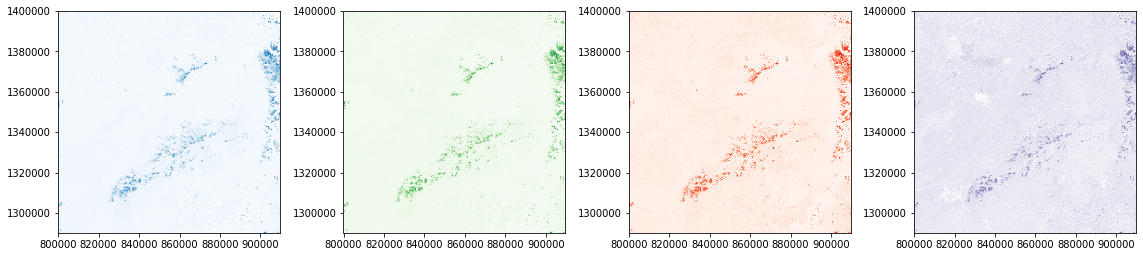

In [11]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4)) 
plot.show(band2, ax=ax1, cmap="Blues")
plot.show(band3, ax=ax2, cmap="Greens")
plot.show(band4, ax=ax3, cmap="Reds")
plot.show(band8, ax=ax4, cmap="Purples")
fig.tight_layout()

In [12]:
trueColor = rasterio.open('output/SentinelTrueColor.tiff', 'w', driver='Gtiff', 
                          width=band4.width, height=band4.height, count=3, 
                          crs=band4.crs, transform=band4.transform, dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1), 3) #blue
trueColor.write(band3.read(1), 2) #green
trueColor.write(band4.read(1), 1) #red
trueColor.close()

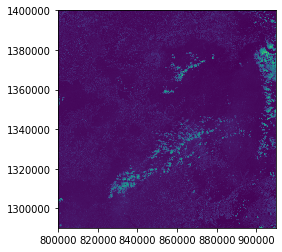

In [13]:
src=rasterio.open(r'output/SentinelTrueColor.tiff', count=3)
plot.show(src)

In [16]:
falseColor = rasterio.open('output/SentinelRightColor.tiff', 'w', driver='Gtiff', 
                          width=band2.width, height=band2.height, count=3, 
                          crs=band2.crs, transform=band2.transform, dtype=band2.dtypes[0]
                         )
falseColor.write(band3.read(1), 3) #blue
falseColor.write(band4.read(1), 2) #green
falseColor.write(band8.read(1), 1) #red
falseColor.close()

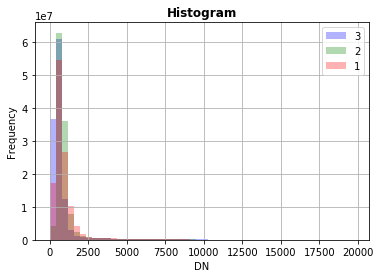

In [17]:
plot.show_hist(src, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title='Histogram')

In [18]:
band11 = rasterio.open('C:/TB/S2A_MSIL2A_20200303T030621_N0214_R075_T48PZU_20200303T074317/S2A_MSIL2A_20200303T030621_N0214_R075_T48PZU_20200303T074317.SAFE/GRANULE/L2A_T48PZU_A024525_20200303T031221/IMG_DATA/R20m/T48PZU_20200303T030621_B11_20m.jp2', driver='JP2OpenJPEG')
print(band11.width, band11.height)

5490 5490


MemoryError: Unable to allocate 4.08 GiB for an array with shape (13401, 20437) and data type complex128

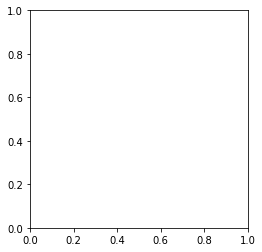

In [22]:
bandai = rasterio.open(r'C:/TB/Données/S1A_IW_SLC__1SDV_20190426T223643_20190426T223710_026967_030909_DC45/S1A_IW_SLC__1SDV_20190426T223643_20190426T223710_026967_030909_DC45.SAFE/measurement/s1a-iw1-slc-vh-20190426t223645-20190426t223710-026967-030909-001.tiff')
plot.show(bandai)